# Using OpenWind for calculating resonances of a simplified trumpet (or hose-o-phone)

The first step is to import the necessary libraries for making our calculations:

In [3]:
import numpy as np
import matplotlib.pyplot as plt

import openwind
print("OK!")

OK!


# Plot hose-o-phone geometry

Make a quick plot of the hose-o-phone profile, so we can check that it looks like what we expect it to look like. The profile is specified by a textfile (hose-o-phone.txt) based on the OpenWind geometry definitions.

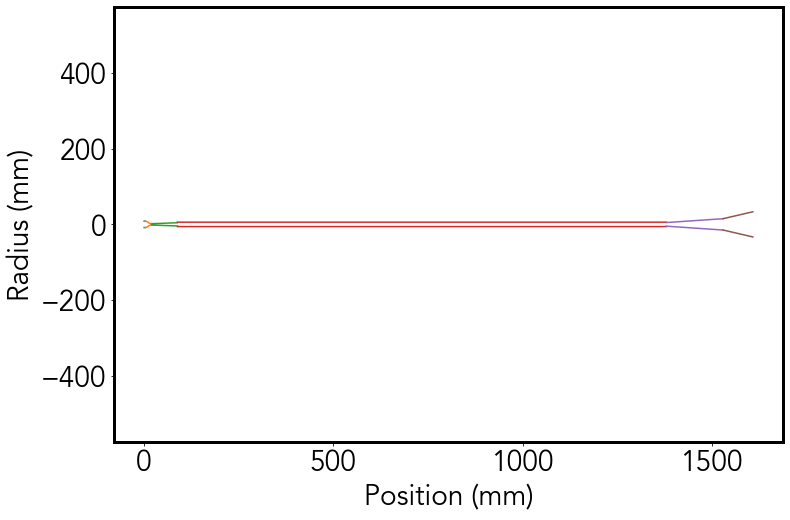

In [4]:
f = plt.figure(figsize=(12,8))
plt.rcParams['font.family'] = 'Avenir'
plt.rcParams['font.size'] = 28
plt.rcParams['axes.linewidth'] = 3

instru_geom = openwind.InstrumentGeometry('hose-o-phone.txt')

instru_geom.plot_InstrumentGeometry(f)

#Optional: uncomment the next line to save the image to a file.
#plt.savefig('Short-hoseophone-profile.png', dpi=300, transparent=False, bbox_inches='tight')

plt.show()

# Calculate the input impedance curve

The following cell makes the main impedance curve plot. By default, OpenWind shows both the input impedance and phase. We will write the calculated impedances to a file for plotting in graphing software. 

Also, OpenWind by default produces a warning that the calculations are made assuming a temperature of 25 degrees C.

/Users/amorriso/opt/anaconda3/lib/python3.7/site-packages/openwind/impedance_computation.py:198: UserWarning: The default temperature is 25 degrees Celsius.
  warnings.warn('The default temperature is 25 degrees Celsius.')


[ 59.26200189 180.26585669 300.19375614 415.86526458 520.6411309
 606.77584505 683.46498527]


<Figure size 3600x2400 with 0 Axes>

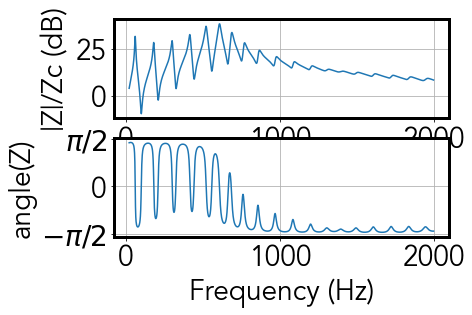

In [5]:
frequencies = np.arange(20,2000,1)
plt.figure(figsize=(12,8), dpi= 300, facecolor='w', edgecolor='k')

result = openwind.ImpedanceComputation(frequencies, 'hose-o-phone.txt')
result.plot_impedance()

#Make a list of first several resonance frequencies for comparison to impedance curve.
rf = result.resonance_frequencies(16)
print(rf)

result.write_impedance('hose-o-phone-calculated-impedance.csv', ', ')

plt.show()

# Optional! - Make a nice plot of the impedance curve here

Use matplotlib to make a nice plot of just the impedance curve.


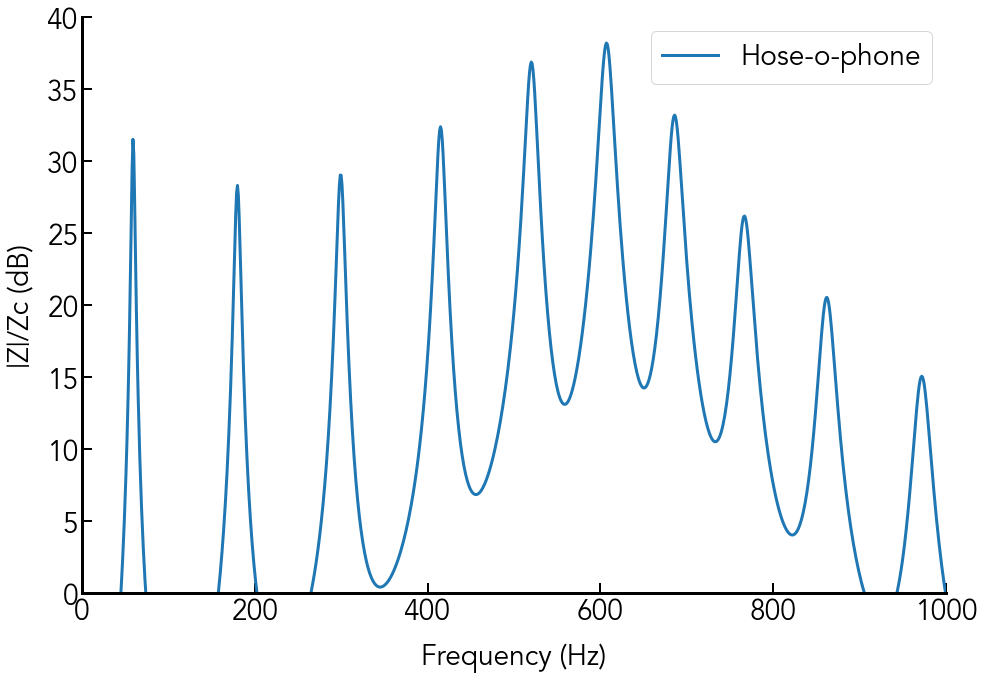

In [6]:
import numpy as np
from pylab import cm

# Generate 2 colors from the 'tab10' colormap
colors = cm.get_cmap('tab10', 2)

freq, impedance, phase = np.loadtxt('hose-o-phone-calculated-impedance.csv', unpack=True, delimiter=' ', usecols=range(3))

fig = plt.figure(figsize=(12,8))
ax = fig.add_axes([0,0,1,1])

# Hide the top and right spines of the axis
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Edit the major and minor ticks of the x and y axes
ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right='on')

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Add the x and y-axis labels
ax.set_xlabel('Frequency (Hz)', labelpad=15)
ax.set_ylabel('|Z|/Zc (dB)', labelpad=10)

ax.plot(freq,20*np.log10(np.abs(impedance)), label="Hose-o-phone", linewidth=3, color=colors(0))

ax.set_ylim(0,40)
ax.set_xlim(0,1000)

plt.legend()

# Uncomment next line to save figure
# plt.savefig('hoseophone_computed_impedance.png', dpi=300, transparent=False, bbox_inches='tight')

plt.show()